# Star Wars Audience Rating

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("DataQuest/Star Wars Survey/star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [5]:
col1 = star_wars['Have you seen any of the 6 films in the Star Wars franchise?']
col2 = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']

In [6]:
col1.value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
col2.value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
col1 = col1.map({"Yes": True,
                 "No": False,
                 np.nan: np.nan})

In [9]:
col1.value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
col2 = col2.map({"Yes": True,
                 "No": False,
                 np.nan: np.nan})

In [11]:
col2.value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [12]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = col1
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = col2

First we converted responses to Yes/No questions to a boolean for easier analysis

In [13]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [14]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_sw1',
                            'Unnamed: 4':'seen_sw2', 
                            'Unnamed: 5':'seen_sw3', 
                            'Unnamed: 6':'seen_sw4', 
                            'Unnamed: 7':'seen_sw5', 
                            'Unnamed: 8':'seen_sw6'})

Second we renamed columns to reflect the responses. Unnamed 4 contains answers for anyone who saw Star Wars Episode 2. 

In [15]:
quest_bool1 = {}
for i in range(1,7):
    col = 'seen_sw{}'.format(i)
    bullie = star_wars[col].str.contains('Star Wars')
    quest_bool1[col] = bullie

In [16]:
star_wars[star_wars.columns[3:9]] = pd.DataFrame(quest_bool1).fillna(False)

In [17]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_sw1,seen_sw2,seen_sw3,seen_sw4,seen_sw5,seen_sw6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Third, we converted each response to a True/False value for the seen questions

In [18]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [19]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranked_sw1',
                            'Unnamed: 10':'ranked_sw2', 
                            'Unnamed: 11':'ranked_sw3', 
                            'Unnamed: 12':'ranked_sw4', 
                            'Unnamed: 13':'ranked_sw5', 
                            'Unnamed: 14':'ranked_sw6'})

In [20]:
star_wars.columns[9:15]

Index(['ranked_sw1', 'ranked_sw2', 'ranked_sw3', 'ranked_sw4', 'ranked_sw5',
       'ranked_sw6'],
      dtype='object')

Fourth, we renamed columns to reflect the responses. Unnamed 10 contains answers for anyone who rated Star Wars Episode 2. 

In [21]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Fifth, we convert all ranking values to a float for easier analysis.

In [104]:
ranked_sw = pd.DataFrame(star_wars.mean(), columns=['Mean']).iloc[9:,:]

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
ranked_sw.reset_index(inplace=True)
ranked_sw = ranked_sw.sort_values("index")
ranked_sw

,index,Mean
0,ranked_sw1,3.732934
1,ranked_sw2,4.087321
2,ranked_sw3,4.341317
3,ranked_sw4,3.272727
4,ranked_sw5,2.513158
5,ranked_sw6,3.047847


Respondents ranked Episode 5 as their most, and Episode 3 as their least favorite of the franchise.

In [107]:
seen_sw = pd.DataFrame(star_wars.iloc[:,3:9].sum())
seen_sw.columns = ['Sum']
seen_sw.reset_index(inplace=True)
seen_sw = seen_sw.sort_values('index')

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

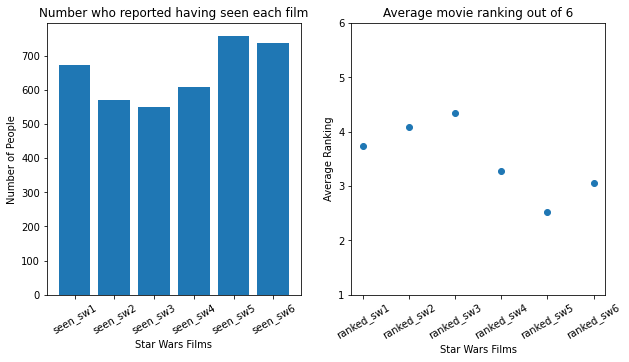

In [121]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.bar(seen_sw['index'],seen_sw['Sum'])
ax1.set_xlabel("Star Wars Films")
ax1.set_ylabel("Number of People")
ax1.set_title("Number who reported having seen each film")
plt.xticks(rotation=30)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(ranked_sw['index'],ranked_sw['Mean'])
ax2.set_xlabel("Star Wars Films")
ax2.set_ylabel("Average Ranking")
ax2.set_title("Average movie ranking out of 6")
ax2.set(ylim=(1,6))
plt.xticks(rotation=30)

More people reported seeing Episode 5, the least watched was Episode 3

In [28]:
seen_sw.reset_index(inplace=True)
ranked_sw.reset_index(inplace=True)

In [30]:
ranked_sw['index'] = ranked_sw['index'].apply(lambda x: x.split("_")[1])
seen_sw['index'] = seen_sw['index'].apply(lambda x: x.split("_")[1])

In [31]:
sw_corr = seen_sw.merge(ranked_sw, on="index")
sw_corr.columns = ['episode','views','mean_rank']
sw_corr

,episode,views,mean_rank
0,sw3,550,4.341317
1,sw2,571,4.087321
2,sw4,607,3.272727
3,sw1,673,3.732934
4,sw6,738,3.047847
5,sw5,758,2.513158


In [32]:
sw_corr.corr()

,views,mean_rank
views,1.000000,-0.878126
mean_rank,-0.878126,1.000000


There is a strong negative correlation between number of views and rank. As more people saw an episode, the better that episode was ranked.

In [65]:
star_wars.groupby('Gender').mean().iloc[:,7:15]

,ranked_sw1,ranked_sw2,ranked_sw3,ranked_sw4,ranked_sw5,ranked_sw6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


In [46]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [47]:
# Seen
m_seen_sw = pd.DataFrame(males.iloc[:,3:9].sum())
m_seen_sw.columns = ['Sum']
m_seen_sw = m_seen_sw.reset_index()
m_seen_sw = m_seen_sw.sort_values('Sum')
f_seen_sw = pd.DataFrame(females.iloc[:,3:9].sum())
f_seen_sw.columns = ['Sum']
f_seen_sw = f_seen_sw.reset_index()
f_seen_sw = f_seen_sw.sort_values('Sum')

In [83]:
# Ranks
m_ranked_sw = pd.DataFrame(males.iloc[:,9:15].mean(), columns=['Mean']).reset_index()
m_ranked_sw = m_ranked_sw.sort_values("Mean")
f_ranked_sw = pd.DataFrame(females.iloc[:,9:15].mean(), columns=['Mean']).reset_index()
f_ranked_sw = f_ranked_sw.sort_values("Mean")

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

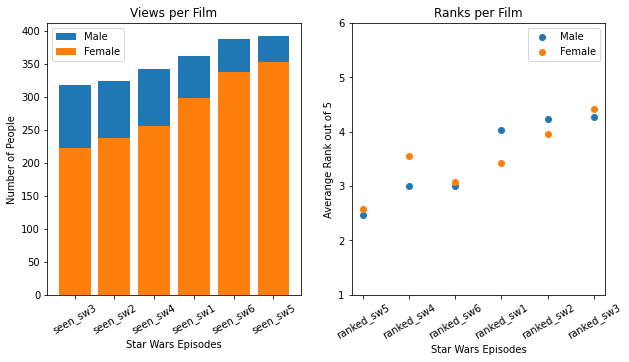

In [122]:
# Seen
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,2,1)
ax1.bar(m_seen_sw['index'], m_seen_sw['Sum'], label= "Male")
ax1.bar(f_seen_sw['index'], f_seen_sw['Sum'], label = "Female")
ax1.legend()
ax1.set_xlabel("Star Wars Episodes")
ax1.set_ylabel('Number of People')
ax1.set_title("Views per Film")
plt.xticks(rotation=30)
# Ranks
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(m_ranked_sw['index'], m_ranked_sw['Mean'], label='Male')
ax2.scatter(f_ranked_sw['index'], f_ranked_sw['Mean'], label='Female')
ax2.legend()
ax2.set_xlabel("Star Wars Episodes")
ax2.set_ylabel('Averange Rank out of 5')
ax2.set_title("Ranks per Film")
ax2.set(ylim=(1,6))
plt.xticks(rotation=30)